In [6]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

## Simple Moving Average Agent

In [7]:
class SMA_Agent:
    def __init__(self, data):
        self.data=data
        self.stock=1
        self.cash=0
        self.price=self.data["Price"][0]
        self.prices=np.array(self.data["Price"])
        self.value=self.stock*self.price+self.cash
        self.up=0.1
        self.down=0.1
        self.length=len(data)
        self.moving_avg=self.MovingAverages(self.prices)
        self.portfolio=[]

    def reset(self):
        """
        Reset agent
        """
        self.cash=0
        self.stock=1
        self.portfolio=[]
    
    def getPortfolioVal(self):
        """
        Returns current portfolio valuation
        """
        return self.stock*self.price+self.cash
    
    def MovingAverages(self, data, window_size=50):
        """
        Generate moving averages for a variable window size
        """
        prices = np.array(data)
        averages = np.array(data)
        for i in range(0, len(data)):
            a = max(0,int(i)-window_size)
            window = prices[a:i+1]
            #print(prices[a:i])
            averages[i] = window.mean()
        averages[0]=prices[0]
        return averages
    
    def Volatility(self, window_size=50):
        """
        Generate Volatility score for a variable window size
        """
        prices = np.array(self.prices)
        volatilities = np.array(self.prices)
        for i in range(0, self.length):
            a = max(0,int(i)-window_size)
            window = prices[a:i+1]
            #print(prices[a:i])
            volatilities[i] = np.sqrt(np.sum(np.square(window-window.mean())))
        volatilities[0]=0
        return volatilities
    
    def run(self, up, down, verbose=0):
        """
        Run agent with constraints about percent above and below the moving average
        """
        self.reset()
        moving_avg = self.moving_avg
        prices = self.prices
        for i in range(0, self.length):
            # buy
            self.portfolio.append(self.stock*self.price+self.cash)
            if(self.cash>prices[i] and prices[i]<(1-down)*moving_avg[i]):
                stocks_to_buy = int(self.cash/prices[i])
                cash_required = prices[i]*int(self.cash/prices[i])
                self.stock += stocks_to_buy
                self.cash -= cash_required
                if verbose:
                    print("Day :%d, Buying %d stocks for %f" % (i, stocks_to_buy, cash_required))
                    #print("Stocks owned %d" % (self.stock))
                    #print("Cash owned %f" % (self.cash))
                    print("Portfolio valuation : %f" % (self.stock*self.price+self.cash))
                continue
            
            # sell
            if(self.stock>0 and prices[i]<(1+up)*moving_avg[i]):
                stocks_to_sell = int(self.stock)
                cash_recieved = prices[i]*(self.stock)
                self.cash+=prices[i]*(self.stock)
                self.stock=0
                if verbose:
                    print("Day :%d, Selling %d stocks for %f" % (i, stocks_to_sell, cash_recieved))
                    #print("Stocks owned %d" % (self.stock))
                    #print("Cash owned %f" % (self.cash))
                    print("Portfolio valuation : %f" % (self.stock*self.price+self.cash))
                continue
        return self.stock*self.price+self.cash

In [10]:
df = pd.read_csv("./Historical data/DABU Historical Data.csv")

In [12]:
agent=SMA_Agent(df)

In [84]:
'''
start = time()
print((agent.run(up=0.01, down=0.01, verbose=1)-277.35)/2.7735)
print(time()-start)
'''

'\nstart = time()\nprint((agent.run(up=0.01, down=0.01, verbose=1)-277.35)/2.7735)\nprint(time()-start)\n'

In [85]:
# Use to get optimal constraints
'''
start = time()
profits = []
up=[]
down=[]
for i in np.linspace(start=0, stop=0.5, num=1000):
    for j in np.linspace(start=0, stop=0.5, num=1000):
        profits.append((agent.run(up=i, down=j)-277.35)/2.7735)
        up.append(i)
        down.append(j)
print(time()-start)
print("Up constraint: %f" % (up[np.argmax(profits)]))
print("Down constraint: %f" % (down[np.argmax(profits)]))
'''

'\nstart = time()\nprofits = []\nup=[]\ndown=[]\nfor i in np.linspace(start=0, stop=0.5, num=1000):\n    for j in np.linspace(start=0, stop=0.5, num=1000):\n        profits.append((agent.run(up=i, down=j)-277.35)/2.7735)\n        up.append(i)\n        down.append(j)\nprint(time()-start)\nprint("Up constraint: %f" % (up[np.argmax(profits)]))\nprint("Down constraint: %f" % (down[np.argmax(profits)]))\n'

## Percent return using optimal constraints

In [13]:
print((agent.run(up=0.0015, down=0.0055)-277.35)/2.7735)

21.777537407607646


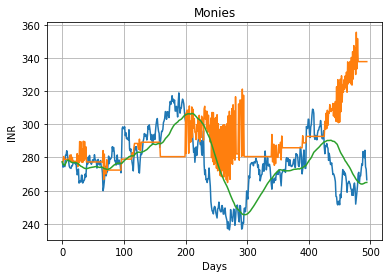

In [89]:
fig, ax = plt.subplots()
ax.plot(range(495), df["Price"])
ax.plot(range(495), agent.portfolio)
ax.plot(range(495), agent.moving_avg)

ax.set(xlabel='Days', ylabel='INR',
       title='Monies')
ax.grid()
plt.show()
plt.savefig("Portfolio value plot.png")

## Bollinger Bands

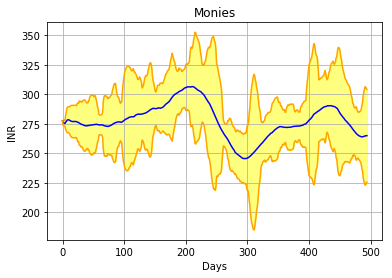

In [26]:
fig, ax = plt.subplots()
ax.plot(range(495), agent.moving_avg+agent.Volatility(window_size=20), color='orange')
ax.plot(range(495), agent.moving_avg, color='blue')
ax.plot(range(495), agent.moving_avg-agent.Volatility(window_size=20), color='orange')

ax.fill_between(range(495), agent.moving_avg+agent.Volatility(window_size=20), 
                agent.moving_avg-agent.Volatility(window_size=20), color='yellow',
                alpha='0.5')

ax.set(xlabel='Days', ylabel='INR',
       title='Monies')
ax.grid()
plt.show()

## Portfolio value after 451 Days

In [36]:
agent.run(up=0.0015, down=0.0055)

337.74999999999983